In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\placement-dataset.csv")
df.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


In [3]:
df.isnull().sum()

city         0
cgpa         8
iq           4
placement    0
dtype: int64

In [4]:
df.drop(columns=['city'], inplace=True)

In [5]:
df.isnull().sum()

cgpa         8
iq           4
placement    0
dtype: int64

In [6]:
df['iq'].fillna(df['iq'].mode()[0], inplace=True)
df['cgpa'].fillna(df['cgpa'].mode()[0], inplace=True)

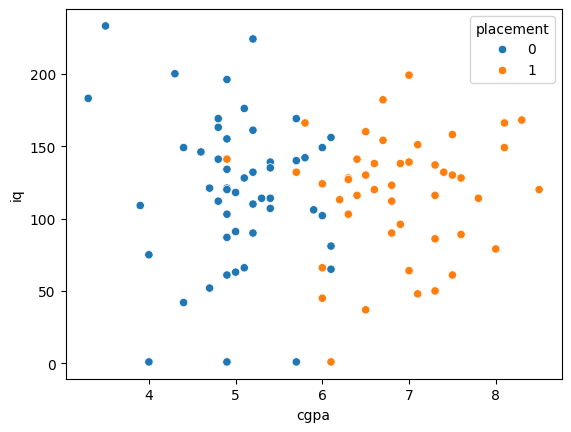

In [7]:
sns.scatterplot(data=df, x='cgpa', y='iq', hue='placement')
plt.show()

In [8]:
x = df.iloc[:, :-1]
y = df['placement']

In [9]:
df['placement'].value_counts()

placement
0    54
1    46
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x), columns=x.columns)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
knn.score(x_train, y_train)*100

92.5

In [14]:
knn.score(x_test, y_test)*100

85.0

In [17]:
x, y

(        cgpa        iq
 0   0.801243  0.190832
 1   0.017418 -0.141560
 2  -0.853498  0.151727
 3   1.323793  0.366805
 4  -0.069673  0.562330
 ..       ...       ...
 95 -1.376048  1.696376
 96 -1.288956 -1.392921
 97  0.714151  1.344431
 98  0.365785 -0.200218
 99  0.278693 -0.004693
 
 [100 rows x 2 columns],
 0     1
 1     0
 2     0
 3     1
 4     0
      ..
 95    0
 96    0
 97    1
 98    1
 99    1
 Name: placement, Length: 100, dtype: int64)

In [18]:
knn.predict([[ 0.801243, 0.190832]])

array([1])

In [ ]:
knn.predict([[0.017418 -0.141560]])